<a href="https://colab.research.google.com/github/Serahverg-8/Deep-Learning-pytorch/blob/main/Pytorch_4_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.__version__

'2.0.1+cu118'

In [33]:
#device agnostic code
import torch
torch.cuda.is_available()
import matplotlib.pyplot as plt
from torch import nn

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#Get data

In [35]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [36]:
num_classes = 4
num_featueres=2
random_seed= 42


In [62]:
X,y = make_blobs(n_samples=1000,n_features=num_featueres, centers=num_classes,cluster_std = 2,random_state=random_seed)

In [63]:
X= torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.LongTensor)

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [66]:
import pandas as pd
clusters= pd.DataFrame({ "X1" : X[:,0],"X2": X[:,1],"label" :y})

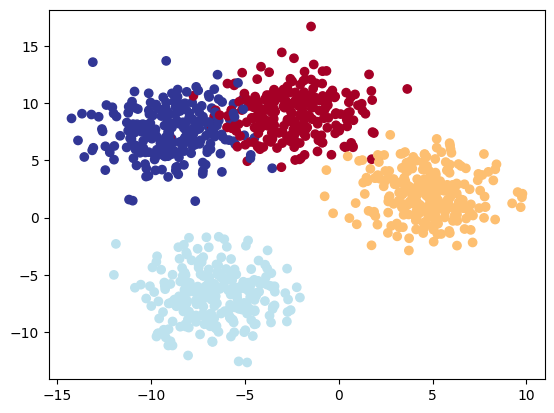

In [67]:
plt.scatter(clusters['X1'],clusters['X2'],c=y, cmap = plt.cm.RdYlBu)


In [68]:
#softmax and crossentropy loss function is used for multiclass classifiction.



#MOdel Building

In [114]:
class multiclass(nn.Module):
  """
     Args: input(int) number of features.
     output(int) number of outputs.
     hidden(int) -- hidden cells """
  def __init__(self, input,output,hidden_units=8):
    super().__init__()

    self.layers=nn.Sequential(nn.Linear(input,hidden_units),
                              nn.ReLU(),
                               nn.Linear(hidden_units,hidden_units),
                              nn.ReLU(),
                              nn.Linear(hidden_units,output))

  def forward(self,x):
    return self.layers(x)


In [115]:
clusters["label"].value_counts()

3    250
2    250
1    250
0    250
Name: label, dtype: int64

Question, Do you think this dataset needs non linearity to separate the clusters? . Non linearity is introduced by passing in activation fuctions like Relu sigmoid etc etc

In [116]:
model_0 = multiclass(2,4,8).to(device)

In [117]:
model_0.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('layers.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('layers.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.11

In [118]:
#loss

#if we have an imbalanced dataset we can also use the weight parameter

loss_function = nn.CrossEntropyLoss()



In [119]:
#optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),lr =0.01)

In [120]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [121]:
epoch =100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [122]:


#before doing anything: this is the output
y_logits=model_0(X_test)
model_0(X_test[:5][:])

tensor([[-0.8118, -0.8307, -1.6751, -1.1760],
        [-0.0902, -0.9269, -0.5813, -0.1338],
        [ 0.2456, -0.2423,  0.1883, -0.0032],
        [-0.3472, -0.4911, -0.8196, -0.6231],
        [-0.3540, -1.4595, -1.3139, -0.4283]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [123]:
y_test[0:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

So we need to change it to a whole number for out put. We will use the softmax activation function for multiclass

In [124]:
y_predicted_raw = torch.softmax(y_logits,dim=1)

In [125]:
y_predicted_raw[0:5]

tensor([[0.3228, 0.3168, 0.1361, 0.2243],
        [0.3331, 0.1443, 0.2038, 0.3188],
        [0.2996, 0.1839, 0.2829, 0.2336],
        [0.3078, 0.2666, 0.1919, 0.2336],
        [0.3785, 0.1253, 0.1449, 0.3514]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [126]:
y_final=torch.argmax(y_predicted_raw,dim=1)
#we use argmax here to print the position of the max. here the position represents the class it belongs to

y_final

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

So now we put everything together

In [127]:
# accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [128]:
epoch =100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [129]:
device

'cuda'

In [130]:
for epoch in range(epoch):
  model_0.train()

  y_logits = model_0(X_train)



  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  #accuracy
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)


  #loss:

  loss = loss_function(y_logits,y_train)



   #optimize zero grad
  optimizer.zero_grad()

  #backpropagation
  loss.backward()

  #optimizer step
  optimizer.step()

  #Test eval
  model_0.eval()

  with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
        # 2. Calculate loss/accuracy
        test_loss = loss_function(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)


  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.16741, Accuracy: 40.50% | Test loss: 1.15287, Test acc: 39.50%
Epoch: 10 | Loss: 1.07814, Accuracy: 54.87% | Test loss: 1.07911, Test acc: 52.50%
Epoch: 20 | Loss: 1.00055, Accuracy: 61.75% | Test loss: 1.01382, Test acc: 60.50%
Epoch: 30 | Loss: 0.93520, Accuracy: 70.38% | Test loss: 0.95684, Test acc: 67.00%
Epoch: 40 | Loss: 0.88075, Accuracy: 76.62% | Test loss: 0.90794, Test acc: 85.00%
Epoch: 50 | Loss: 0.83505, Accuracy: 88.12% | Test loss: 0.86569, Test acc: 87.50%
Epoch: 60 | Loss: 0.79624, Accuracy: 90.12% | Test loss: 0.82889, Test acc: 90.50%
Epoch: 70 | Loss: 0.76264, Accuracy: 91.12% | Test loss: 0.79632, Test acc: 91.00%
Epoch: 80 | Loss: 0.73284, Accuracy: 91.88% | Test loss: 0.76689, Test acc: 91.50%
Epoch: 90 | Loss: 0.70581, Accuracy: 92.25% | Test loss: 0.73975, Test acc: 91.50%


In [131]:
#make sure your GPU is running

In [132]:
print(test_pred[0:5],y_test[0:5])

tensor([1, 3, 2, 1, 0], device='cuda:0') tensor([1, 3, 2, 1, 0], device='cuda:0')


In [133]:
#Plotting decision boundary: multiclass on 2d data

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


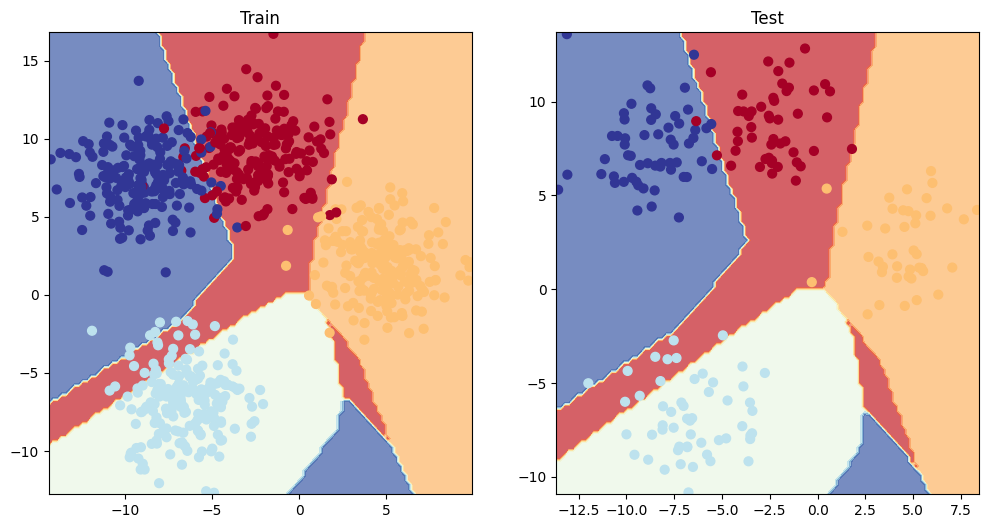

In [134]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


In [135]:
#since our data is linearly separable, we dont need the non linear layers actually.

WE can use torch metrics to add more metrics

In [136]:
!pip install torchmetrics

In [137]:
from torchmetrics import Accuracy,Precision,Recall,ConfusionMatrix

In [138]:
tm_accuracy= Accuracy(task='multiclass',
                                     num_classes=num_classes).to(device)

In [139]:
tm_accuracy(test_pred,y_test)

tensor(0.9150, device='cuda:0')

#Precision:

In [140]:
tm_precision= Precision(task="multiclass", average='macro',
                                     num_classes=num_classes).to(device)

In [141]:
tm_precision(test_pred,y_test)

tensor(0.9257, device='cuda:0')

#Recall

In [142]:
tm_recall= Recall(task='multiclass',
                                     num_classes=num_classes).to(device)

tm_recall(test_pred,y_test)

tensor(0.9150, device='cuda:0')

#Confusion Matrix

In [143]:
confmat = ConfusionMatrix(task="multiclass", num_classes=4).to(device)
confmat(test_pred, y_test)

tensor([[46,  1,  0,  2],
        [ 2, 39,  0,  0],
        [ 9,  0, 43,  1],
        [ 2,  0,  0, 55]], device='cuda:0')